# EDA para información entregada por Sernapesca

#### Introducción
Este Noteboopk corresponde al análisis exploratorio del archivo enviado por sernapesca llamado "Reporte de Plantas.xlsx", el cual es extraido desde una platadorma interna, la cual no es la ya conocida Reporteador. 
 
Resumen:
* Tiene una dimensión de (54211, 35).
* Este archivo es una tabla con los ingresos a las plantas, entrega información de los centros de cultivo de origen.
* Es para la III, IV, V, RM, VIII, IX, X, XIV.
* Tiene una temporalidad a nivel de día y va desde enero de 2021 hasta junio de 2022.
* Sólo para las especies de Molusco.

### Import libreries

In [1]:
import logging
import subprocess
import os   
import pandas as pd
import seaborn as sns

### Reading file "Ingresos"

In [2]:
%%time
reporte_plantas_raw = pd.read_excel("../data/datos_sernapesca/Reporte de Plantas.xlsx")

CPU times: total: 28.5 s
Wall time: 29.1 s


In [3]:
reporte_plantas_raw.shape

(54211, 35)

In [4]:
reporte_plantas_raw.head()

,Año Declaración,Mes Declaración,Región Agente,Tipo Agente,Código Agente,Nombre Agente,Fecha Declaración,Nº Declaración,idStock,Tipo Item,...,utilizado,Toneladas Rest,Unidades Rest,Tipo Declaración,idBodega,Nombre Bodega,Tipo Bodega,Dirección Bodega,Ciudad Bodega,Región Bodega
0,2021,ene.,III REGION,Planta,3061,CAMANCHACA S.A.,2021-01-19,3607070,4412221,ESP,...,-1,0.0,0,Planta Abastecimiento,1980,RMP,PLANTA,"Diego de Almeyda 1003, Caldera\n",Caldera,III REGION
1,2021,ene.,III REGION,Planta,3061,CAMANCHACA S.A.,2021-01-19,3607070,4412222,ESP,...,-1,0.0,0,Planta Abastecimiento,1980,RMP,PLANTA,"Diego de Almeyda 1003, Caldera\n",Caldera,III REGION
2,2021,ene.,III REGION,Planta,3061,CAMANCHACA S.A.,2021-01-19,3607070,4412223,ESP,...,-1,0.0,0,Planta Abastecimiento,1980,RMP,PLANTA,"Diego de Almeyda 1003, Caldera\n",Caldera,III REGION
3,2021,ene.,III REGION,Planta,3061,CAMANCHACA S.A.,2021-01-19,3607071,4412225,ESP,...,-1,0.0,0,Planta Abastecimiento,1980,RMP,PLANTA,"Diego de Almeyda 1003, Caldera\n",Caldera,III REGION
4,2021,ene.,III REGION,Planta,3061,CAMANCHACA S.A.,2021-01-19,3607071,4412226,ESP,...,-1,0.0,0,Planta Abastecimiento,1980,RMP,PLANTA,"Diego de Almeyda 1003, Caldera\n",Caldera,III REGION


In [5]:
reporte_plantas_raw.columns.to_list()

['Año Declaración',
 'Mes Declaración',
 'Región Agente',
 'Tipo Agente',
 'Código Agente',
 'Nombre Agente',
 'Fecha Declaración',
 'Nº Declaración',
 'idStock',
 'Tipo Item',
 'Código Item',
 'Nombre Item',
 'Fecha Item',
 'Estado Recurso',
 'Tipo Origen',
 'Código Origen',
 'Nombre Origen',
 'Folio Origen',
 'Tipo Ult. Proveedor',
 'Código Ult. Proveedor',
 'Nombre Ult. Proveedor',
 'Folio Ult. Proveedor',
 'Fecha Ult. Proveedor',
 'Toneladas Abastecidas',
 'Unidades Abastecidas',
 'utilizado',
 'Toneladas Rest',
 'Unidades Rest',
 'Tipo Declaración',
 'idBodega',
 'Nombre Bodega',
 'Tipo Bodega',
 'Dirección Bodega',
 'Ciudad Bodega',
 'Región Bodega']

In [6]:
reporte_plantas_raw.info

<bound method DataFrame.info of        Año Declaración Mes Declaración         Región Agente Tipo Agente  \
0                 2021            ene.            III REGION      Planta   
1                 2021            ene.            III REGION      Planta   
2                 2021            ene.            III REGION      Planta   
3                 2021            ene.            III REGION      Planta   
4                 2021            ene.            III REGION      Planta   
...                ...             ...                   ...         ...   
54206             2022            jun.  REGION METROPOLITANA      Planta   
54207             2022            jun.  REGION METROPOLITANA      Planta   
54208             2022            jun.  REGION METROPOLITANA      Planta   
54209             2022            jun.  REGION METROPOLITANA      Planta   
54210             2021            jun.            XIV REGION      Planta   

       Código Agente                                   

In [7]:
reporte_plantas_raw.describe()

,Año Declaración,Código Agente,Nº Declaración,idStock,Código Item,Código Origen,Folio Origen,Código Ult. Proveedor,Folio Ult. Proveedor,Toneladas Abastecidas,Unidades Abastecidas,Toneladas Rest,idBodega
count,54211.000000,54211.000000,5.421100e+04,5.421100e+04,54211.000000,54211.000000,5.421100e+04,54211.000000,5.421100e+04,54211.000000,54211.000000,54211.000000,54211.000000
mean,2021.390954,10553.460276,3.758622e+06,5.492582e+06,430.770692,101613.924683,6.968702e+05,73688.623748,1.212061e+06,12.567038,220.313294,0.306546,2908.368855
std,0.487969,1123.627020,9.948752e+04,7.026123e+05,4.475930,10554.387008,8.370285e+04,44532.792420,8.294345e+05,6.870604,1660.490364,1.404914,475.163295
min,2021.000000,3061.000000,3.597585e+06,4.344185e+06,425.000000,30052.000000,1.606080e+05,498.000000,2.204530e+05,0.001000,0.000000,0.000000,347.000000
25%,2021.000000,10671.000000,3.672702e+06,4.885706e+06,430.000000,102389.000000,6.558465e+05,6794.000000,6.630885e+05,10.000000,0.000000,0.000000,2719.000000
50%,2021.000000,10752.000000,3.735151e+06,5.336157e+06,430.000000,103334.000000,6.798220e+05,102515.000000,6.987030e+05,10.835000,0.000000,0.000000,2750.000000
75%,2022.000000,10774.000000,3.849761e+06,6.135358e+06,430.000000,103765.000000,7.021245e+05,103652.000000,2.149322e+06,12.550000,0.000000,0.000000,2869.000000
max,2022.000000,14004.000000,3.923734e+06,6.654844e+06,457.000000,814014.000000,1.025508e+06,814014.000000,6.236651e+06,88.750000,55000.000000,60.370000,4278.000000


In [8]:
reporte_plantas_raw.duplicated().sum()

0

In [9]:
reporte_plantas_raw.isnull().sum()

Año Declaración          0
Mes Declaración          0
Región Agente            0
Tipo Agente              0
Código Agente            0
Nombre Agente            0
Fecha Declaración        0
Nº Declaración           0
idStock                  0
Tipo Item                0
Código Item              0
Nombre Item              0
Fecha Item               0
Estado Recurso           0
Tipo Origen              0
Código Origen            0
Nombre Origen            0
Folio Origen             0
Tipo Ult. Proveedor      0
Código Ult. Proveedor    0
Nombre Ult. Proveedor    0
Folio Ult. Proveedor     0
Fecha Ult. Proveedor     0
Toneladas Abastecidas    0
Unidades Abastecidas     0
utilizado                0
Toneladas Rest           0
Unidades Rest            0
Tipo Declaración         0
idBodega                 0
Nombre Bodega            0
Tipo Bodega              0
Dirección Bodega         0
Ciudad Bodega            0
Región Bodega            0
dtype: int64

In [10]:
reporte_plantas_raw.dtypes

Año Declaración                   int64
Mes Declaración                  object
Región Agente                    object
Tipo Agente                      object
Código Agente                     int64
Nombre Agente                    object
Fecha Declaración        datetime64[ns]
Nº Declaración                    int64
idStock                           int64
Tipo Item                        object
Código Item                       int64
Nombre Item                      object
Fecha Item               datetime64[ns]
Estado Recurso                   object
Tipo Origen                      object
Código Origen                     int64
Nombre Origen                    object
Folio Origen                      int64
Tipo Ult. Proveedor              object
Código Ult. Proveedor             int64
Nombre Ult. Proveedor            object
Folio Ult. Proveedor              int64
Fecha Ult. Proveedor     datetime64[ns]
Toneladas Abastecidas           float64
Unidades Abastecidas              int64


In [11]:
#ingresos_raw['Fecha'] = pd.to_datetime(ingresos_raw['Año'].astype(str) +'/'+ ingresos_raw['Mes'].astype(str), format="%Y/%m")
#ingresos_raw['Fecha'].unique().tolist()
reporte_plantas_raw['Fecha Ult. Proveedor'].astype(str).unique().tolist()

['2021-01-05',
 '2021-01-06',
 '2021-01-26',
 '2021-01-27',
 '2021-01-28',
 '2021-02-01',
 '2021-02-02',
 '2021-02-03',
 '2021-02-04',
 '2021-01-07',
 '2021-01-11',
 '2021-01-12',
 '2021-01-13',
 '2021-01-14',
 '2021-01-18',
 '2021-01-20',
 '2021-01-21',
 '2021-01-22',
 '2021-01-25',
 '2021-02-08',
 '2021-02-09',
 '2021-02-10',
 '2021-02-11',
 '2021-02-15',
 '2021-02-16',
 '2021-02-17',
 '2021-02-18',
 '2021-02-23',
 '2021-02-24',
 '2021-02-25',
 '2021-03-01',
 '2021-03-02',
 '2021-03-04',
 '2021-03-08',
 '2021-03-09',
 '2021-03-10',
 '2021-03-17',
 '2021-03-16',
 '2021-04-14',
 '2021-04-15',
 '2021-04-16',
 '2021-04-06',
 '2021-04-07',
 '2021-04-08',
 '2021-04-12',
 '2021-04-19',
 '2021-04-20',
 '2021-04-13',
 '2021-04-21',
 '2021-04-22',
 '2021-04-26',
 '2021-04-27',
 '2021-04-28',
 '2021-04-29',
 '2021-06-02',
 '2021-06-03',
 '2021-06-07',
 '2021-06-08',
 '2021-06-09',
 '2021-06-10',
 '2021-06-14',
 '2021-06-15',
 '2021-06-16',
 '2021-06-17',
 '2021-06-22',
 '2021-06-29',
 '2021-06-

In [97]:
report_plantas_XR['utilizado'].value_counts()

-1    53841
-       133
Name: utilizado, dtype: int64

In [12]:
reporte_plantas_raw['Estado Recurso'].unique().tolist()

['ENTERO']

In [66]:
reporte_plantas_raw['Tipo Item'].unique().tolist()

['ESP']

In [29]:
# Viendo si la columna fecha item es igual a la columna fecha ultimo proveedor
list1 = report_plantas_XR['Fecha Item'].tolist()
list2 = report_plantas_XR['Fecha Ult. Proveedor'].tolist()
list1 == list2

# Al parecer hay varios registros en los que se puede apreciar que la fecha item es 
# un dia menos que la fecha del ultimo proveedor, es decir los centros de cultivo mantienen
# a los más un día su producto fuera del mar antes de venderlo, aun así existen algunos 
# registros donde se aprecia demoras de incluso 15 días entre cosecha y llegada a la planta.

False

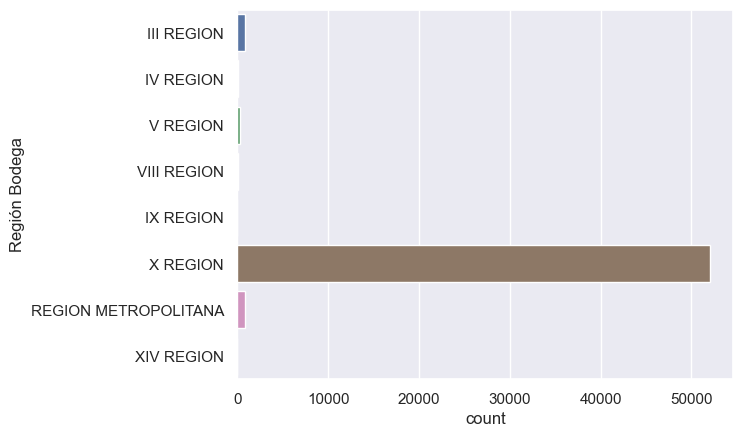

In [64]:
def count_clases(df, column_name):
    sns.set_theme(style="darkgrid")
    ax = sns.countplot(y=column_name, data=df)
    sns.set(rc = {'figure.figsize':(25,8)})
    #for item in ax.get_xticklabels():
    #    item.set_rotation(90)

count_clases(reporte_plantas_raw, 'Región Bodega')

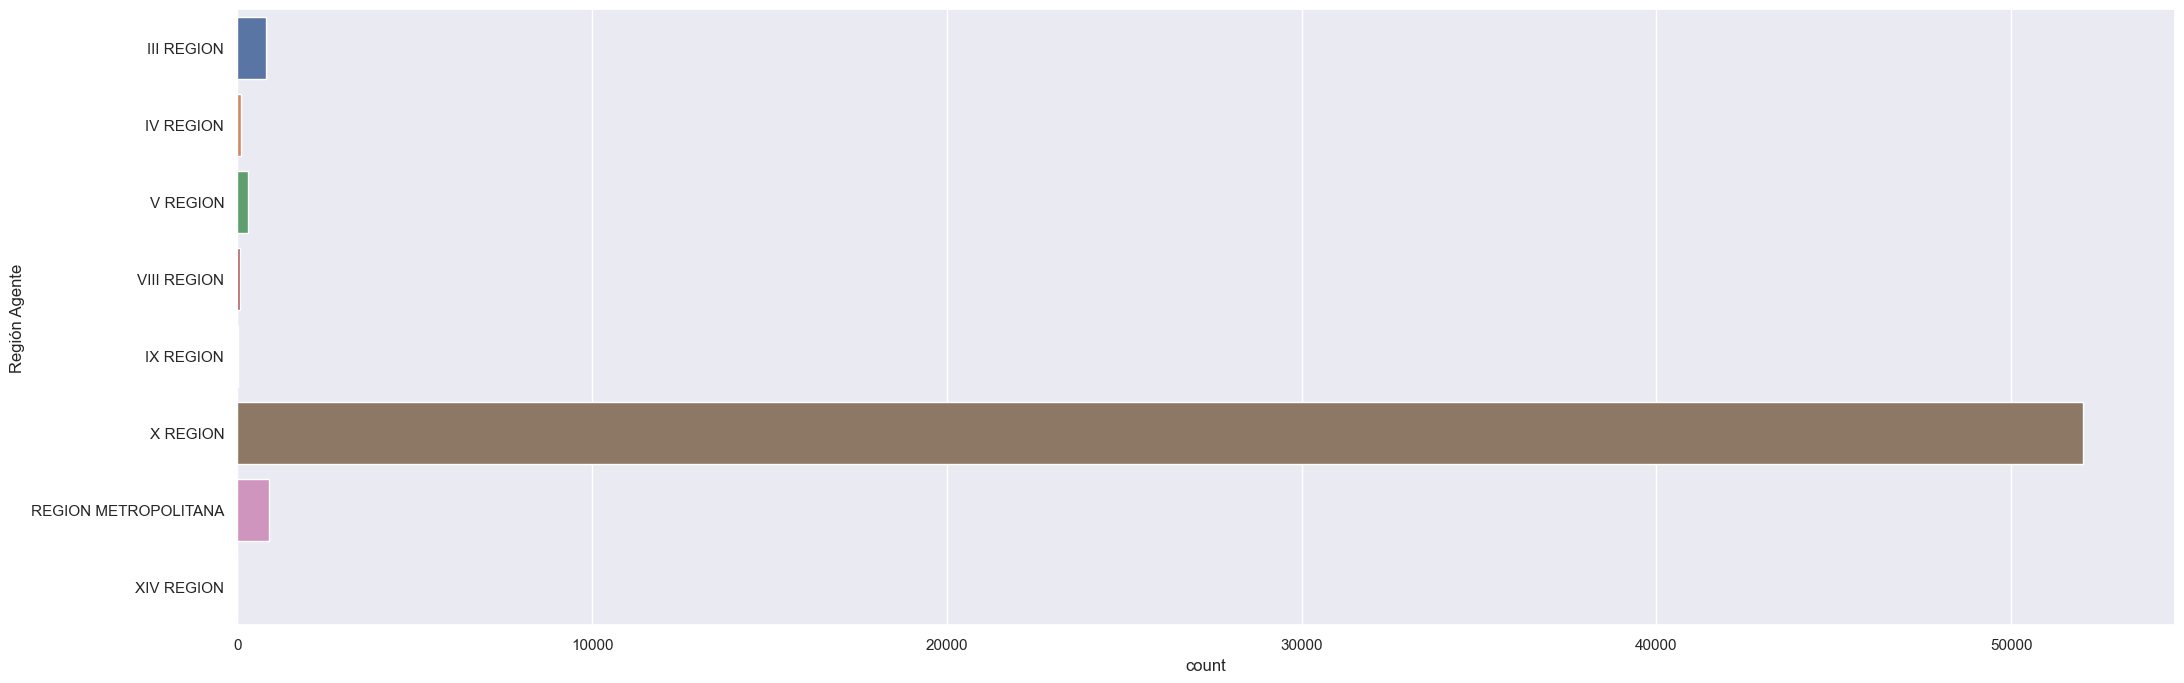

In [16]:
count_clases(reporte_plantas_raw,'Región Agente')

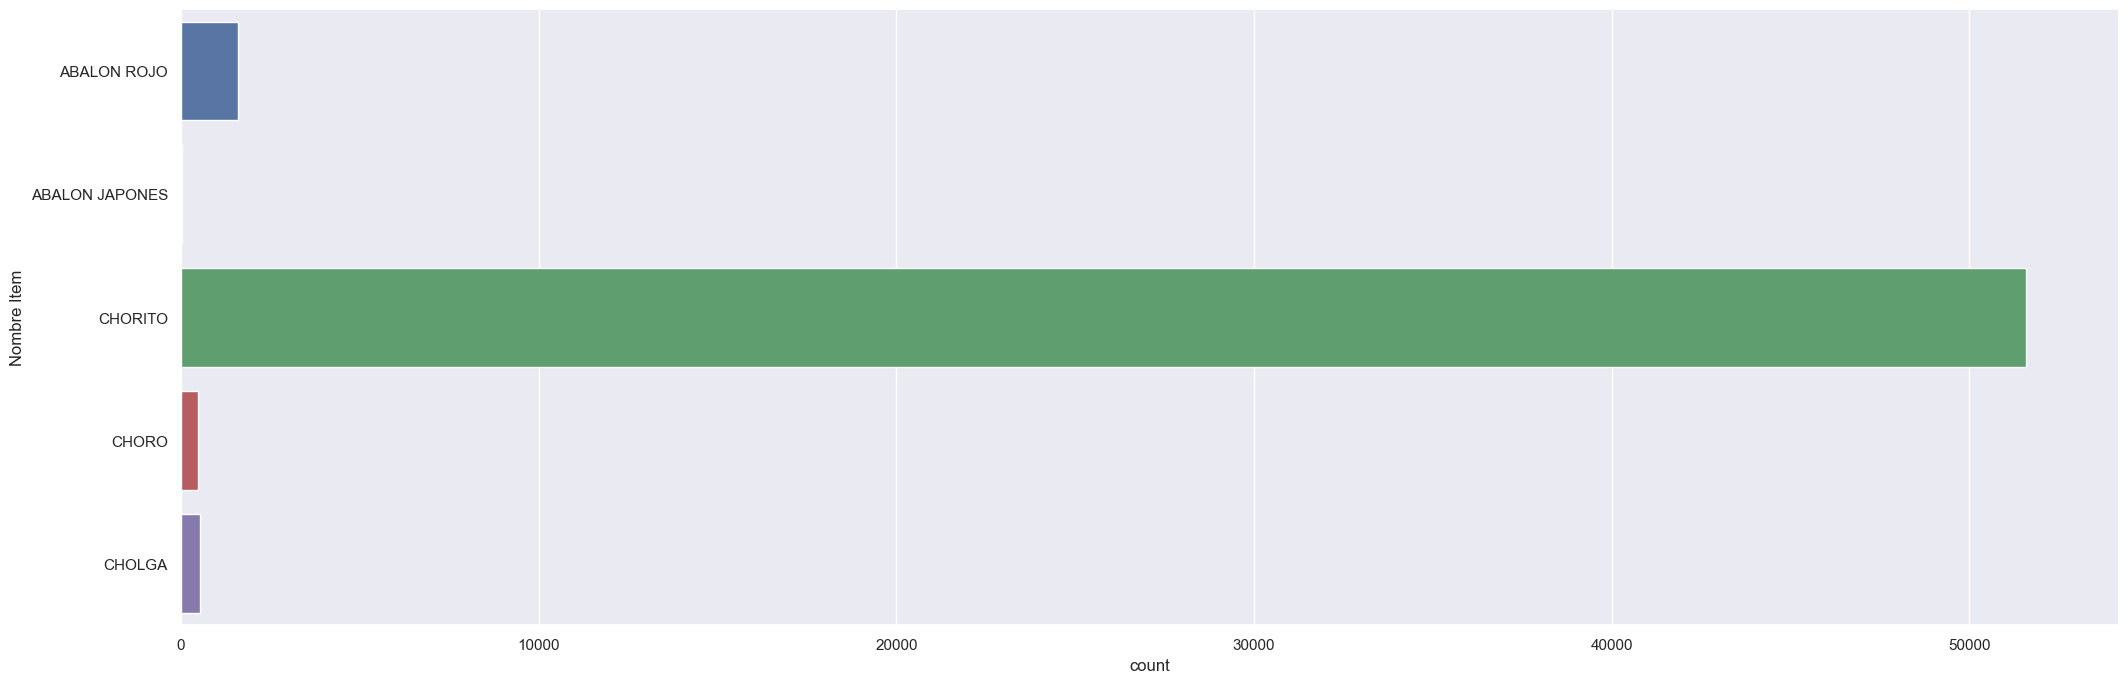

In [17]:
count_clases(reporte_plantas_raw,'Nombre Item')

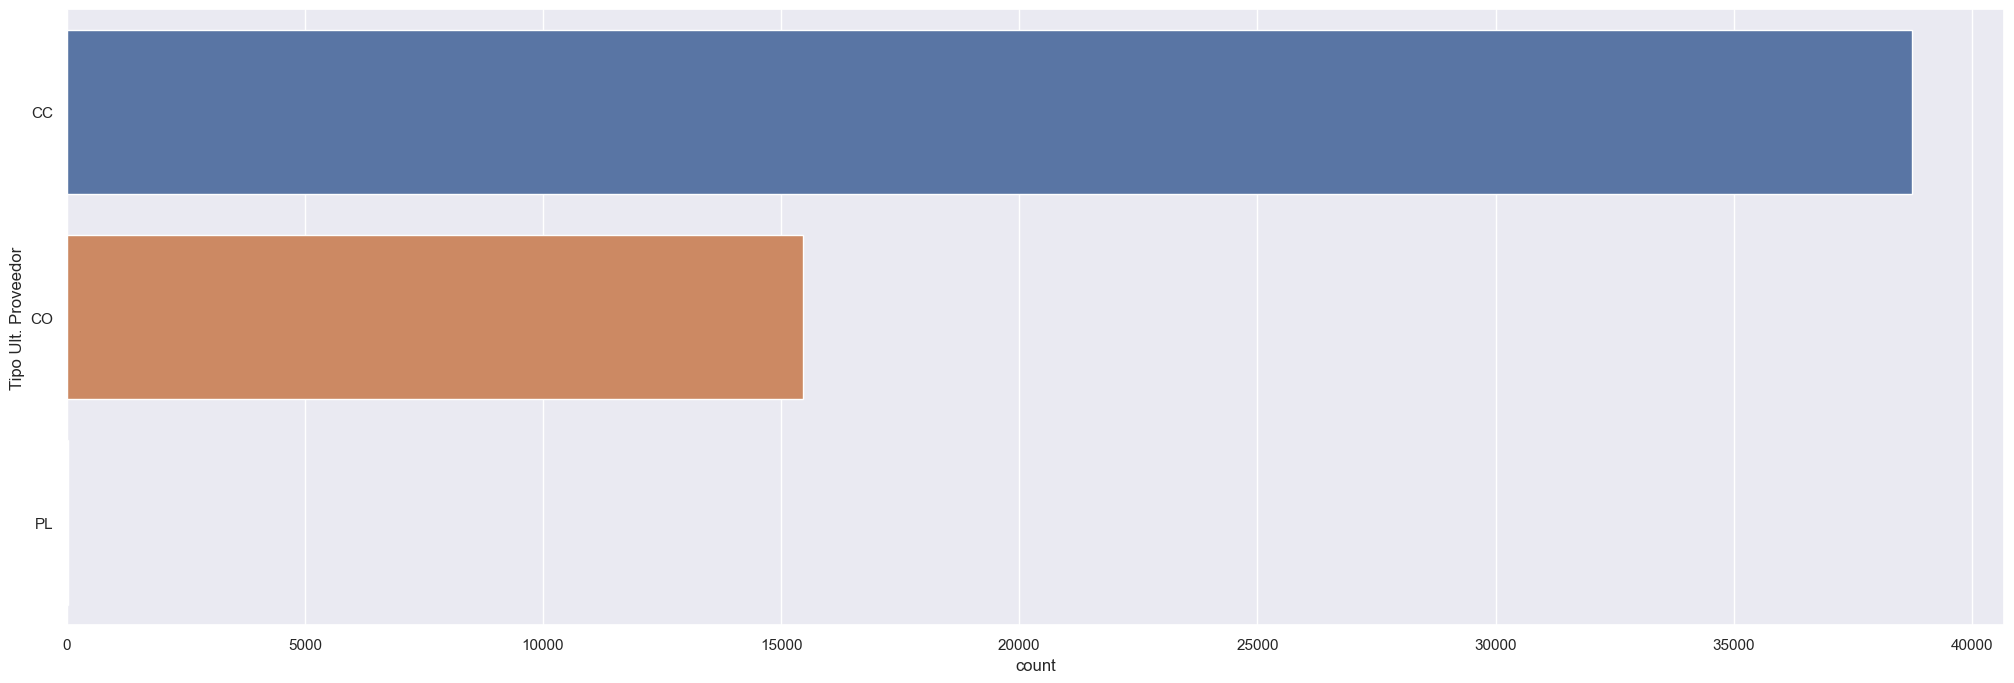

In [18]:
count_clases(reporte_plantas_raw, 'Tipo Ult. Proveedor')

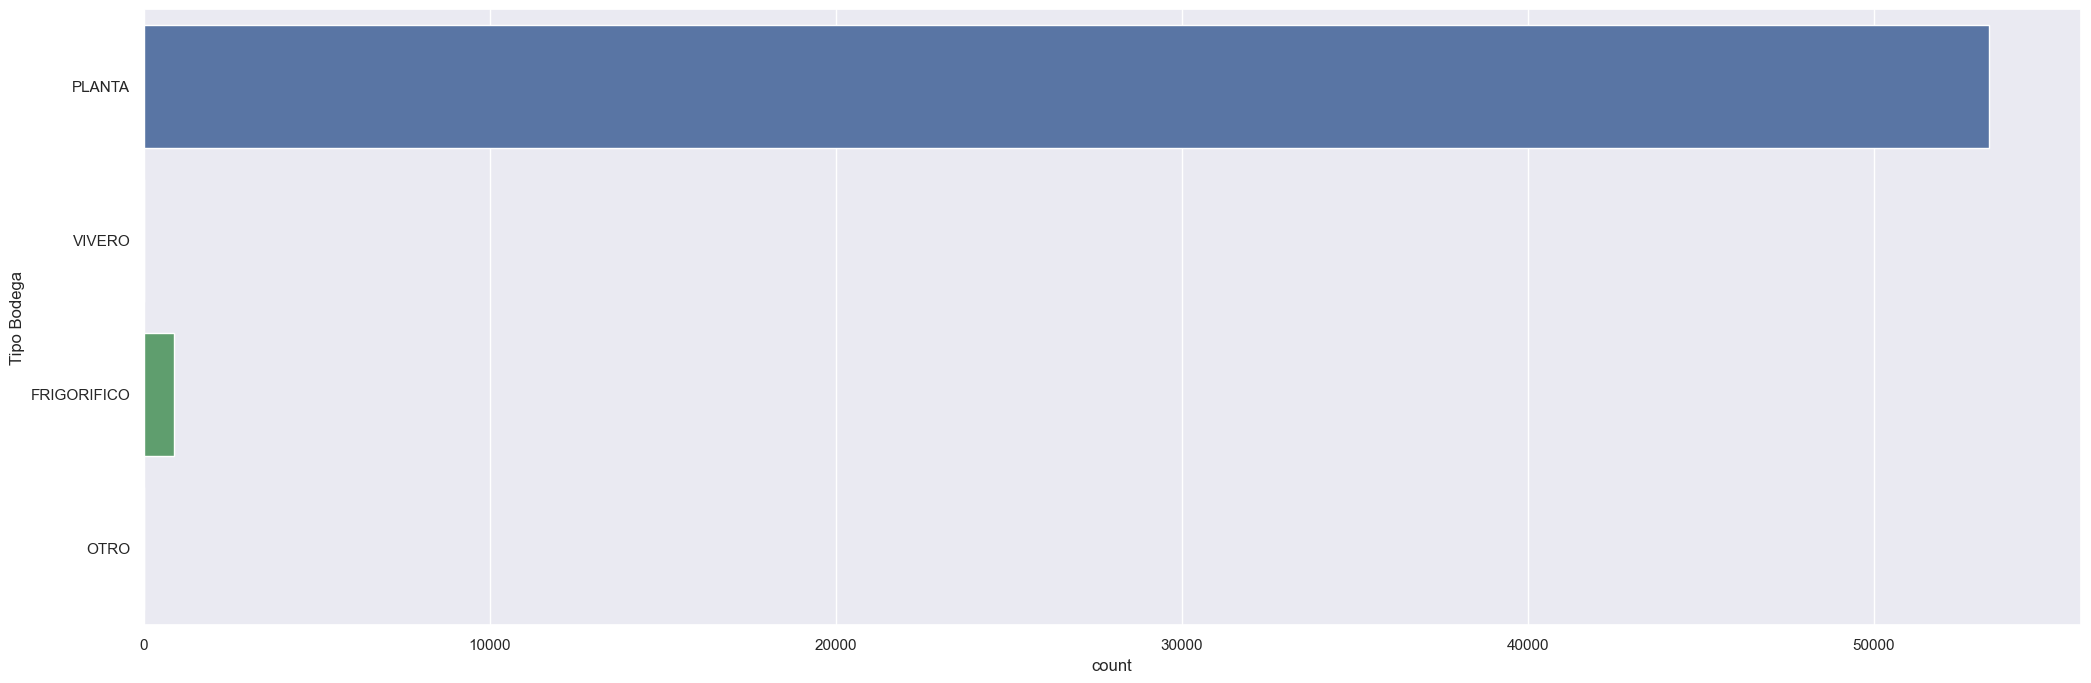

In [19]:
count_clases(reporte_plantas_raw,'Tipo Bodega')

In [ ]:
#len(reporte_plantas_raw)
q_centros_ingresos = len(reporte_plantas_raw['Codigo Centro'].unique().tolist())
q_centros_origen = len(reporte_plantas_raw['Cod. Origen'].unique().tolist())
print(f'En total existen {q_centros_ingresos} lugares de ingresos y {q_centros_origen} lugares de origen ' )

En total existen 1211 lugares de ingresos y 935 lugares de origen 


In [ ]:
reporte_plantas_raw['Región Agente'].unique().tolist()
#reporte_plantas_raw['Tipo Item'].unique().tolist()
#reporte_plantas_raw['Tipo Origen'].unique().tolist()

['III REGION',
 'IV REGION',
 'V REGION',
 'VIII REGION',
 'IX REGION',
 'X REGION',
 'REGION METROPOLITANA',
 'XIV REGION']

In [ ]:
reporte_plantas_raw['Región Bodega'].unique().tolist()

['III REGION',
 'IV REGION',
 'V REGION',
 'VIII REGION',
 'IX REGION',
 'X REGION',
 'REGION METROPOLITANA',
 'XIV REGION']

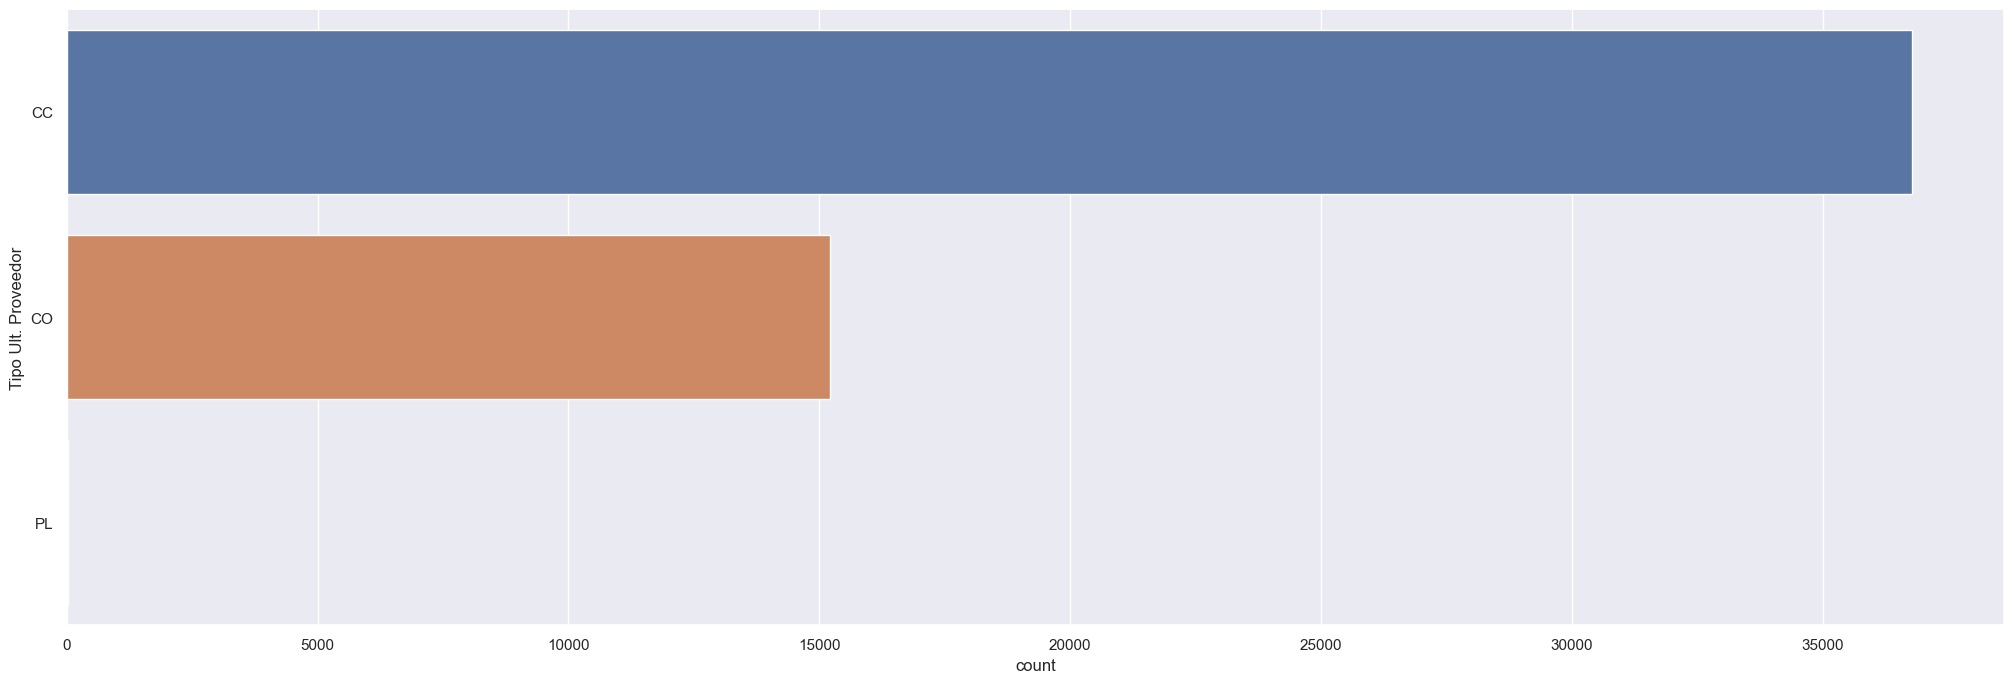

In [86]:
count_clases(report_plantas_XR,'Tipo Ult. Proveedor')

In [91]:
report_plantas_XR['Tipo Ult. Proveedor'].value_counts()

CC    36778
CO    15217
PL       16
Name: Tipo Ult. Proveedor, dtype: int64

In [90]:
list_of_false = [element for element in range(len(list1)) if list1[element] != list2[element]] 
#(i  for i list1[i] != list2[i])
origen_dist_proveedor = report_plantas_XR.loc[list_of_false]
#origen_dist_proveedor = origen_dist_proveedor[['Código Origen', 'Código Ult. Proveedor']]
origen_dist_proveedor['Tipo Ult. Proveedor'].value_counts()

CO    15217
PL       16
Name: Tipo Ult. Proveedor, dtype: int64

In [ ]:
origen_dist_proveedor.to_excel('hola.xlsx')

### Filters

In [94]:
report_plantas_XR = reporte_plantas_raw[(reporte_plantas_raw['Región Bodega'] == 'X REGION') |
                                        (reporte_plantas_raw['Región Agente'] == 'X REGION') |
                                        (reporte_plantas_raw['Tipo Ult. Proveedor'] == 'CC')]
                                        
report_plantas_XR = report_plantas_XR.reset_index()                                        
#report_plantas_XR = reporte_plantas_raw[reporte_plantas_raw['Región Agente'] == 'X REGION']
#report_plantas_XR = reporte_plantas_raw[reporte_plantas_raw['Región Bodega'] == 'X REGION']
report_plantas_XR.shape

(53974, 36)

In [104]:
report_plantas_XR

,index,Año Declaración,Mes Declaración,Tipo Agente,Código Agente,Nombre Agente,Código Item,Nombre Item,Fecha Item,Tipo Origen,Código Origen,Nombre Origen,Código Ult. Proveedor,Nombre Ult. Proveedor,Toneladas Abastecidas,Toneladas Rest,Tipo Bodega,Dirección Bodega,Ciudad Bodega,Región Bodega
0,0,2021,ene.,Planta,3061,CAMANCHACA S.A.,456,ABALON ROJO,2021-01-05,CC,30052,SECTOR I,30052,SECTOR I,0.534,0.0,PLANTA,"Diego de Almeyda 1003, Caldera\n",Caldera,III REGION
1,1,2021,ene.,Planta,3061,CAMANCHACA S.A.,456,ABALON ROJO,2021-01-05,CC,30052,SECTOR I,30052,SECTOR I,0.521,0.0,PLANTA,"Diego de Almeyda 1003, Caldera\n",Caldera,III REGION
2,2,2021,ene.,Planta,3061,CAMANCHACA S.A.,456,ABALON ROJO,2021-01-05,CC,30052,SECTOR I,30052,SECTOR I,0.351,0.0,PLANTA,"Diego de Almeyda 1003, Caldera\n",Caldera,III REGION
3,3,2021,ene.,Planta,3061,CAMANCHACA S.A.,456,ABALON ROJO,2021-01-06,CC,30052,SECTOR I,30052,SECTOR I,0.542,0.0,PLANTA,"Diego de Almeyda 1003, Caldera\n",Caldera,III REGION
4,4,2021,ene.,Planta,3061,CAMANCHACA S.A.,456,ABALON ROJO,2021-01-06,CC,30052,SECTOR I,30052,SECTOR I,0.521,0.0,PLANTA,"Diego de Almeyda 1003, Caldera\n",Caldera,III REGION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53969,54121,2022,jun.,Planta,13161,ALIMEX S.A.,435,CHORO,2022-06-19,CC,101664,*,101664,*,0.500,0.0,PLANTA,AVDA. LO ESPEJO 02635,Santiago,REGION METROPOLITANA
53970,54122,2022,jun.,Planta,13161,ALIMEX S.A.,425,CHOLGA,2022-06-21,CC,101664,*,101664,*,0.420,0.0,PLANTA,AVDA. LO ESPEJO 02635,Santiago,REGION METROPOLITANA
53971,54123,2022,jun.,Planta,13161,ALIMEX S.A.,430,CHORITO,2022-06-21,CC,101664,*,101664,*,0.920,0.0,PLANTA,AVDA. LO ESPEJO 02635,Santiago,REGION METROPOLITANA
53972,54124,2022,jun.,Planta,13161,ALIMEX S.A.,435,CHORO,2022-06-21,CC,101664,*,101664,*,0.480,0.0,PLANTA,AVDA. LO ESPEJO 02635,Santiago,REGION METROPOLITANA


In [105]:
#len(reporte_plantas_raw)
q_centros_ingresos = len(report_plantas_XR['Código Agente'].unique().tolist())
q_centros_origen = len(report_plantas_XR['Código Origen'].unique().tolist())
print(f'En total existen {q_centros_ingresos} lugares de ingresos y {q_centros_origen} lugares de origen ' )

En total existen 46 lugares de ingresos y 624 lugares de origen 


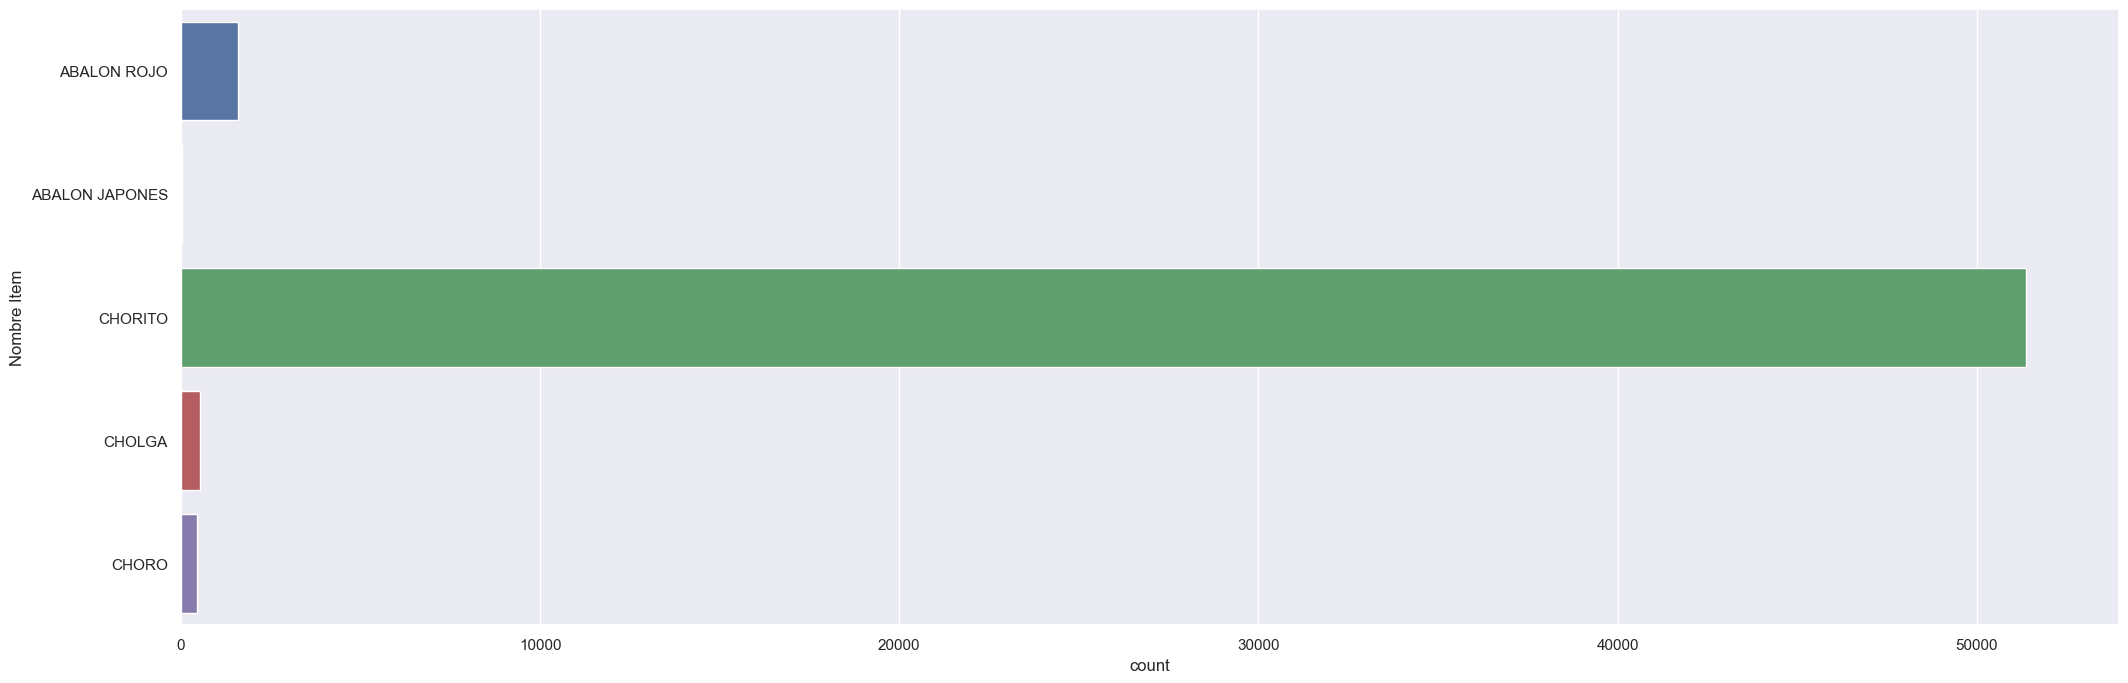

In [95]:
count_clases(report_plantas_XR,'Nombre Item')

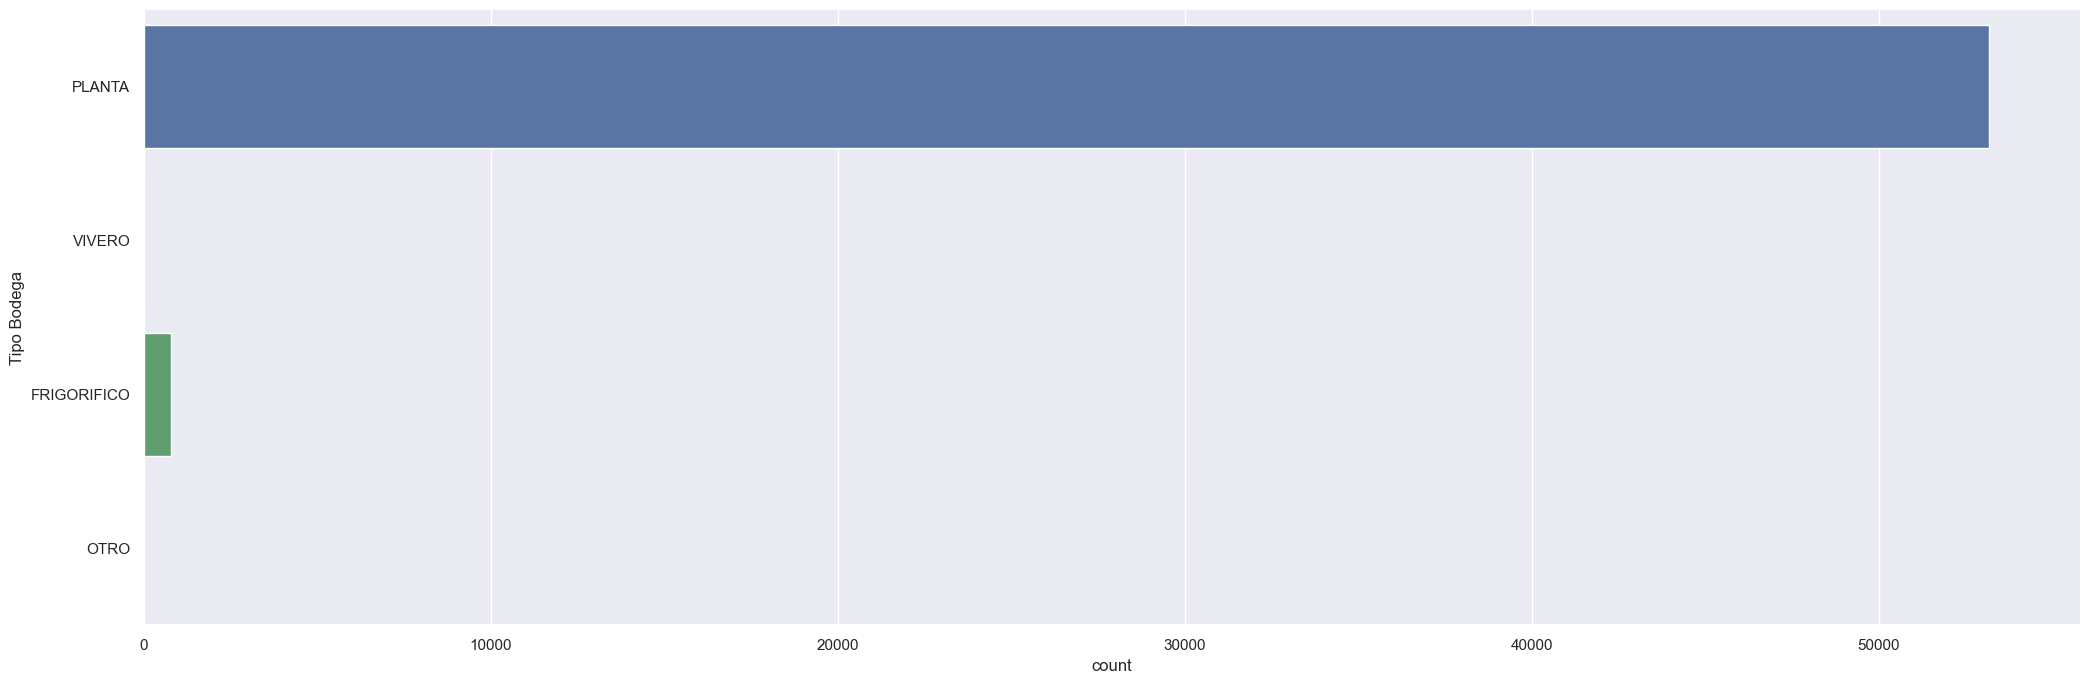

In [96]:
count_clases(report_plantas_XR,'Tipo Bodega')

In [44]:
# Viendo si la columna fecha item es igual a la columna fecha ultimo proveedor
list1 = report_plantas_XR['Fecha Item'].tolist()
list2 = report_plantas_XR['Fecha Ult. Proveedor'].tolist()
list1 == list2

# Al parecer hay varios registros en los que se puede apreciar que la fecha item es 
# un dia menos que la fecha del ultimo proveedor, es decir los centros de cultivo mantienen
# a los más un día su producto fuera del mar antes de venderlo, aun así existen algunos 
# registros donde se aprecia demoras de incluso 15 días entre cosecha y llegada a la planta.


False

In [50]:
list_of_false = [element for element in range(len(list1)) if list1[element] != list2[element]] 
#(i  for i list1[i] != list2[i])
reportes_atrasados = report_plantas_XR.loc[list_of_false]
reportes_atrasados = reportes_atrasados[['Fecha Item', 'Fecha Ult. Proveedor']]
reportes_atrasados

,Fecha Item,Fecha Ult. Proveedor
68,2021-01-15,2021-01-17
74,2021-01-15,2021-01-18
79,2021-01-15,2021-01-19
87,2021-01-15,2021-01-20
93,2021-01-15,2021-01-21
...,...,...
52000,2022-06-22,2022-06-23
52004,2022-06-22,2022-06-23
52005,2022-06-22,2022-06-23
52006,2022-06-22,2022-06-23


In [62]:
reportes_atrasados['deltatime_day'] = (reportes_atrasados['Fecha Ult. Proveedor']-reportes_atrasados['Fecha Item']).astype('timedelta64[D]')
reportes_atrasados

,Fecha Item,Fecha Ult. Proveedor,deltatime_day
68,2021-01-15,2021-01-17,2.0
74,2021-01-15,2021-01-18,3.0
79,2021-01-15,2021-01-19,4.0
87,2021-01-15,2021-01-20,5.0
93,2021-01-15,2021-01-21,6.0
...,...,...,...
52000,2022-06-22,2022-06-23,1.0
52004,2022-06-22,2022-06-23,1.0
52005,2022-06-22,2022-06-23,1.0
52006,2022-06-22,2022-06-23,1.0


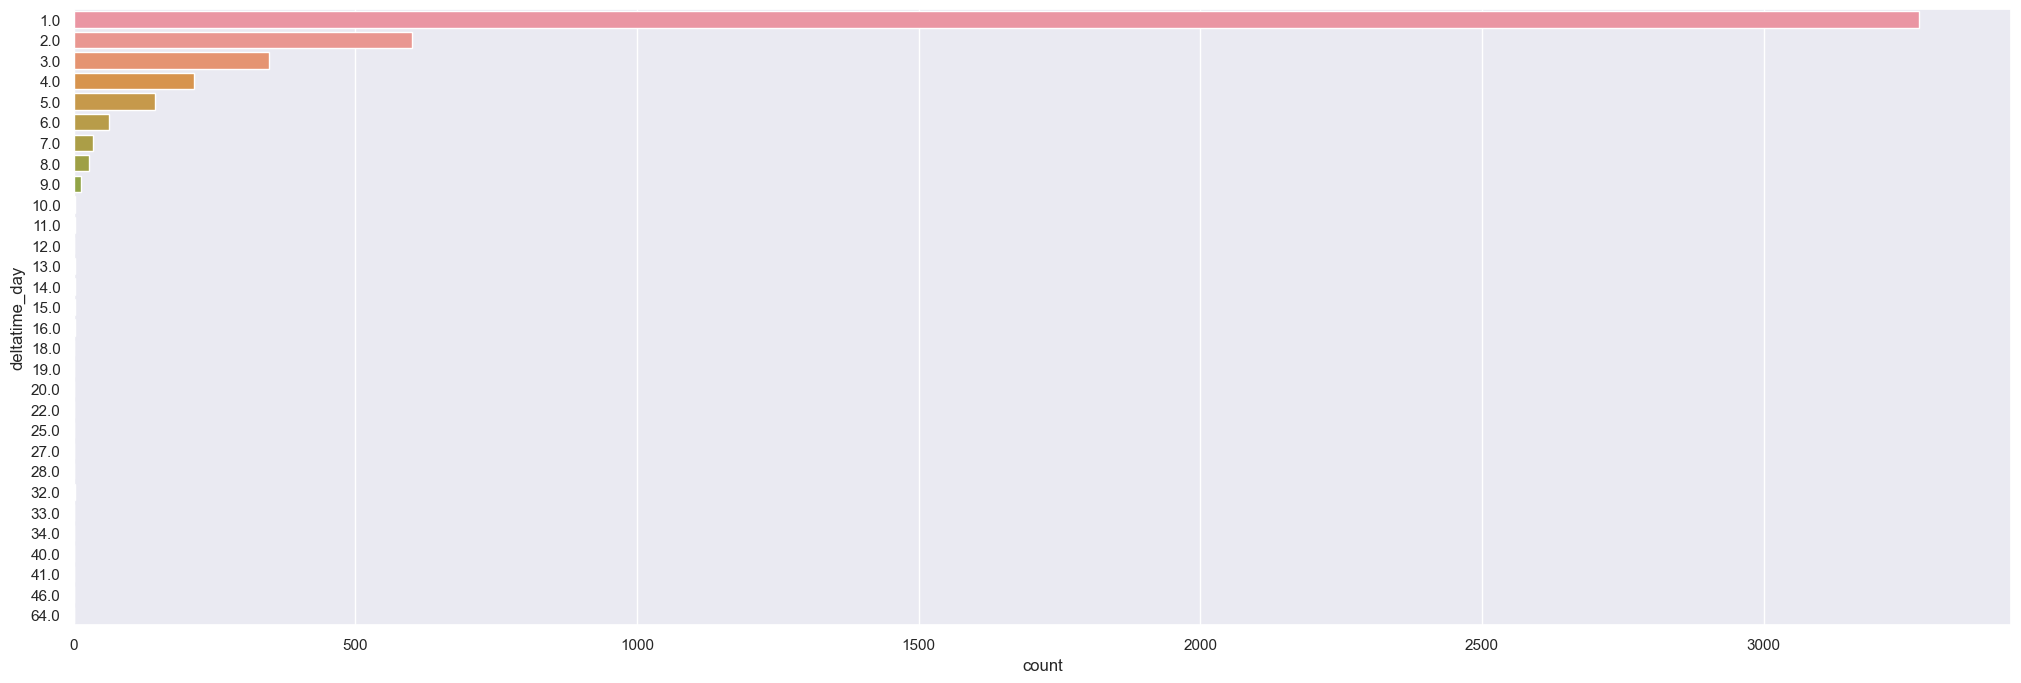

In [65]:
count_clases(reportes_atrasados,'deltatime_day')

### Droping columns

In [101]:
# columnmas a eliminar.
to_drop = ['Región Agente',
           'Fecha Declaración',
           'Nº Declaración',
           'idStock',
           'Tipo Item',
           'Estado Recurso',
           'Folio Origen',
           'Tipo Ult. Proveedor',
           'Folio Ult. Proveedor',
           'Fecha Ult. Proveedor',
           'utilizado',
           'Unidades Rest',
           'Unidades Abastecidas',
           'Tipo Declaración',
           'idBodega',
           'Nombre Bodega']

# eliminando columnas que no sirven.
report_plantas_XR = report_plantas_XR.drop(to_drop, axis=1)

In [102]:
report_plantas_XR

,index,Año Declaración,Mes Declaración,Tipo Agente,Código Agente,Nombre Agente,Código Item,Nombre Item,Fecha Item,Tipo Origen,Código Origen,Nombre Origen,Código Ult. Proveedor,Nombre Ult. Proveedor,Toneladas Abastecidas,Toneladas Rest,Tipo Bodega,Dirección Bodega,Ciudad Bodega,Región Bodega
0,0,2021,ene.,Planta,3061,CAMANCHACA S.A.,456,ABALON ROJO,2021-01-05,CC,30052,SECTOR I,30052,SECTOR I,0.534,0.0,PLANTA,"Diego de Almeyda 1003, Caldera\n",Caldera,III REGION
1,1,2021,ene.,Planta,3061,CAMANCHACA S.A.,456,ABALON ROJO,2021-01-05,CC,30052,SECTOR I,30052,SECTOR I,0.521,0.0,PLANTA,"Diego de Almeyda 1003, Caldera\n",Caldera,III REGION
2,2,2021,ene.,Planta,3061,CAMANCHACA S.A.,456,ABALON ROJO,2021-01-05,CC,30052,SECTOR I,30052,SECTOR I,0.351,0.0,PLANTA,"Diego de Almeyda 1003, Caldera\n",Caldera,III REGION
3,3,2021,ene.,Planta,3061,CAMANCHACA S.A.,456,ABALON ROJO,2021-01-06,CC,30052,SECTOR I,30052,SECTOR I,0.542,0.0,PLANTA,"Diego de Almeyda 1003, Caldera\n",Caldera,III REGION
4,4,2021,ene.,Planta,3061,CAMANCHACA S.A.,456,ABALON ROJO,2021-01-06,CC,30052,SECTOR I,30052,SECTOR I,0.521,0.0,PLANTA,"Diego de Almeyda 1003, Caldera\n",Caldera,III REGION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53969,54121,2022,jun.,Planta,13161,ALIMEX S.A.,435,CHORO,2022-06-19,CC,101664,*,101664,*,0.500,0.0,PLANTA,AVDA. LO ESPEJO 02635,Santiago,REGION METROPOLITANA
53970,54122,2022,jun.,Planta,13161,ALIMEX S.A.,425,CHOLGA,2022-06-21,CC,101664,*,101664,*,0.420,0.0,PLANTA,AVDA. LO ESPEJO 02635,Santiago,REGION METROPOLITANA
53971,54123,2022,jun.,Planta,13161,ALIMEX S.A.,430,CHORITO,2022-06-21,CC,101664,*,101664,*,0.920,0.0,PLANTA,AVDA. LO ESPEJO 02635,Santiago,REGION METROPOLITANA
53972,54124,2022,jun.,Planta,13161,ALIMEX S.A.,435,CHORO,2022-06-21,CC,101664,*,101664,*,0.480,0.0,PLANTA,AVDA. LO ESPEJO 02635,Santiago,REGION METROPOLITANA
